In [41]:
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,AveragePooling2D,Conv2D
from tensorflow.keras.datasets import fashion_mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler

## About LeNet-5 model 

- LeNet model is implemented first in 1998 <br />
- It consists of 5 layers (3 conv + 2 fully connected layers)

- **Format** :
INPUT IMAGE ⇒ C1 ⇒ TANH ⇒ S2 ⇒ C3 ⇒ TANH ⇒ S4 ⇒ C5 ⇒ TANH ⇒ FC6 ⇒
SOFTMAX7
- But I am doing a bit modification here and using "relu" instead of "tanh"


## Loading Data and BASIC Preprocessing

In [42]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [43]:
x_train,x_test = x_train.reshape(x_train.shape[0],28,28,1) / 255.0 ,x_test.reshape(x_test.shape[0],28,28,1) / 255.0

In [44]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

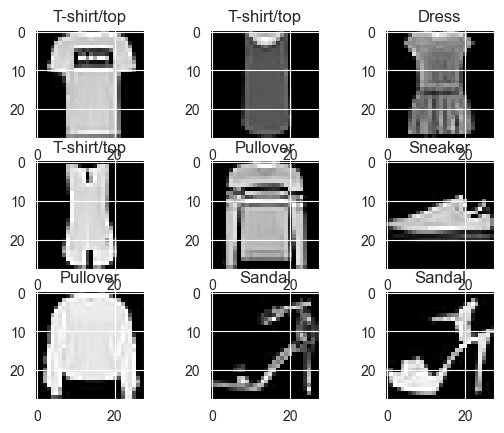

In [45]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(x_train[i],cmap="gray")
    plt.title(class_names[y_train[i]])

## Displaying Images

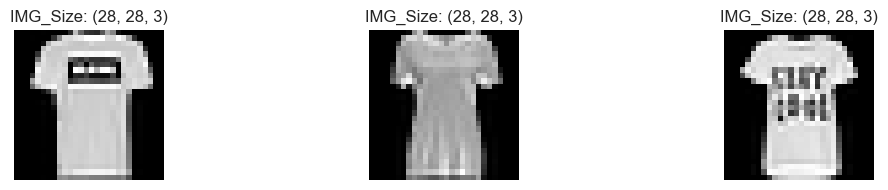

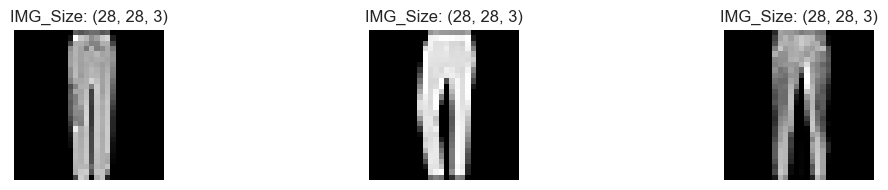

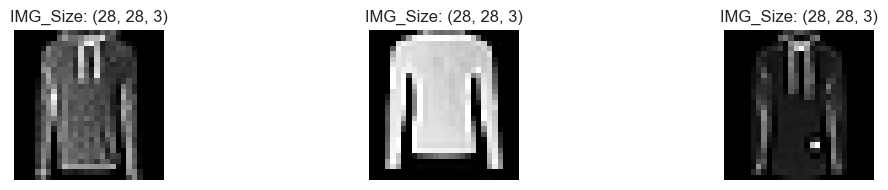

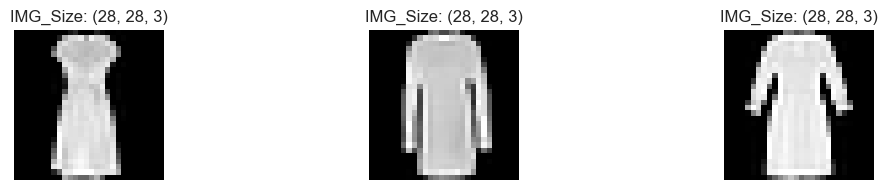

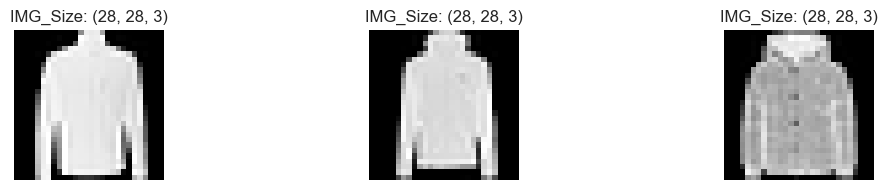

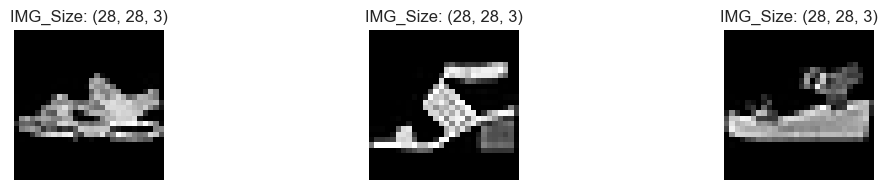

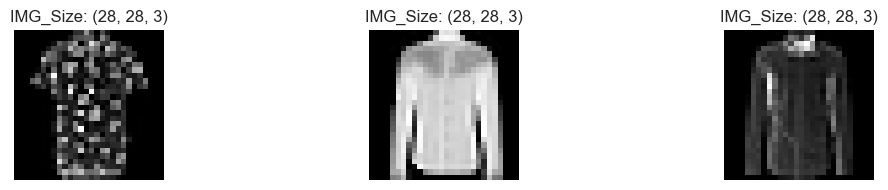

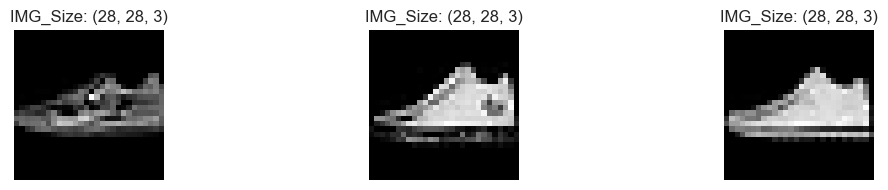

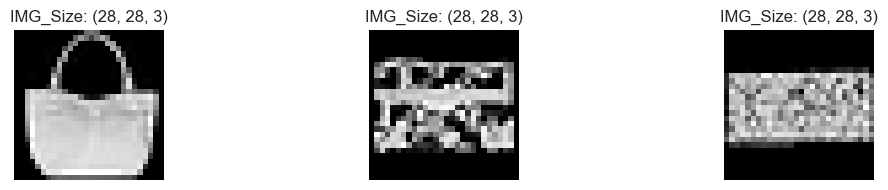

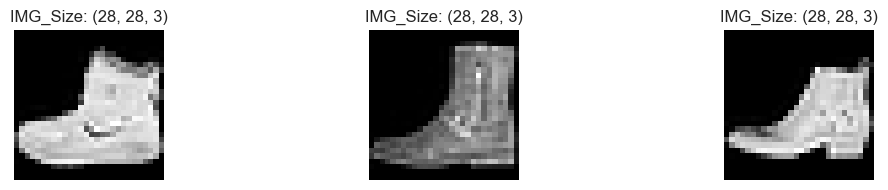

In [46]:
train_folder= 'train'
test_folder= 'test'

files = ['0', '1','2','3','4','5','6','7','8','9']

def Display_IMAGES(folder):
    for file in files:
        path = os.path.join(folder, file)
        fig, axes = plt.subplots(1, 3, figsize=(12, 2))
        for i, img in enumerate(os.listdir(path)[:3]):
            img_array = cv2.imread(os.path.join(path, img))

            # Display the image with size in the title
            img_shape = img_array.shape
            axes[i].imshow(img_array)
            axes[i].set_title(f"IMG_Size: {img_shape}")
            axes[i].axis('off')

        plt.tight_layout()

    plt.show()

Display_IMAGES(train_folder)

## Building LeNet-5 Model 

In [47]:
model = Sequential([
    Conv2D(filters=6,kernel_size=5,strides=1,input_shape=(28,28,1),padding="same",activation="relu"),
    AveragePooling2D(pool_size=2,strides=2),
    
     Conv2D(filters=16,kernel_size=5,strides=1,activation="relu"),
    AveragePooling2D(pool_size=2,strides=2),
    
     Conv2D(filters=120,kernel_size=5,strides=1,activation="relu"),

    Flatten(),
    Dense(84,activation="relu"),
    Dense(10,activation="softmax")
])

D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["acc"])

In [50]:
hist = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.5291 - loss: 1.2846 - val_acc: 0.7507 - val_loss: 0.6922
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.7629 - loss: 0.6262 - val_acc: 0.7931 - val_loss: 0.5523
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8038 - loss: 0.5274 - val_acc: 0.8163 - val_loss: 0.5047
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8236 - loss: 0.4792 - val_acc: 0.8032 - val_loss: 0.5236
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8378 - loss: 0.4431 - val_acc: 0.8331 - val_loss: 0.4567
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8500 - loss: 0.4147 - val_acc: 0.8429 - val_loss: 0.4318
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8564 - loss: 0.3956 - val_acc: 0.8470 - val_loss: 0.4186
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8616 - loss: 0.3811 - val_acc: 0.8556 - val_loss: 0.4060
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━

In [51]:
loss,acc = model.evaluate(x_test,y_test)
acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8926 - loss: 0.3338


0.8924000263214111

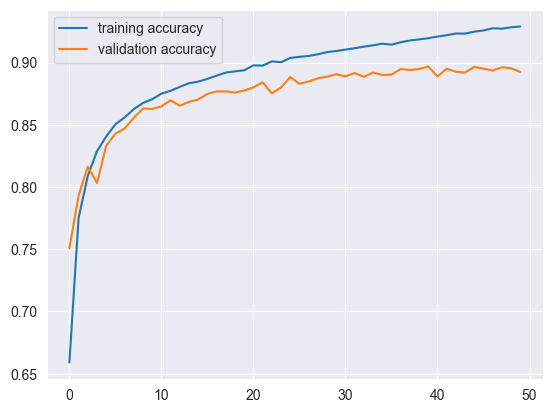

In [52]:
plt.plot(hist.history["acc"], label="training accuracy")
plt.plot(hist.history["val_acc"], label="validation accuracy")
plt.legend()

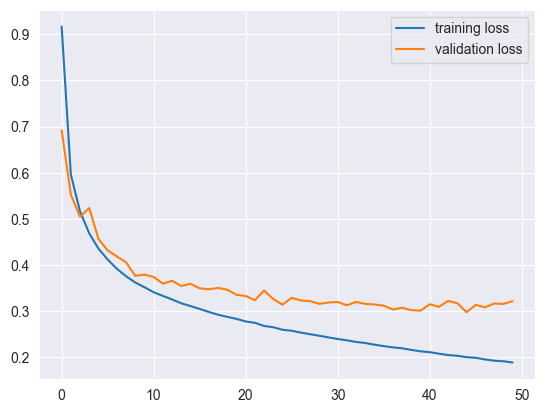

In [53]:
plt.plot(hist.history["loss"], label="training loss")
plt.plot(hist.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

In [54]:
# Saving the trained model
model.save("lenet5_model.h5")
print("Model saved as lenet5_model.h5")

Model saved as lenet5_model.h5


In [55]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = load_model("lenet5_model.h5")
print("Model loaded successfully.")


Model loaded successfully.


In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


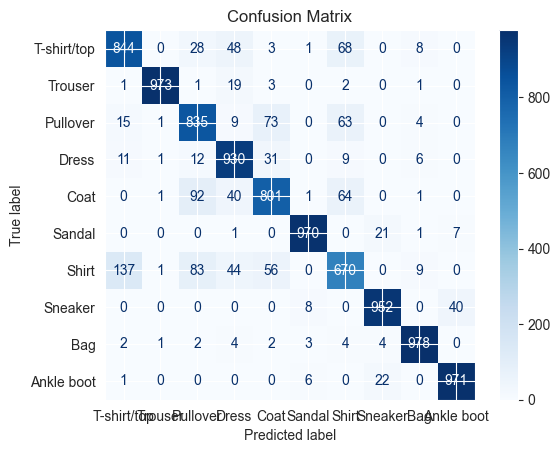

In [57]:
# Make predictions on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)  # Get the predicted class
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


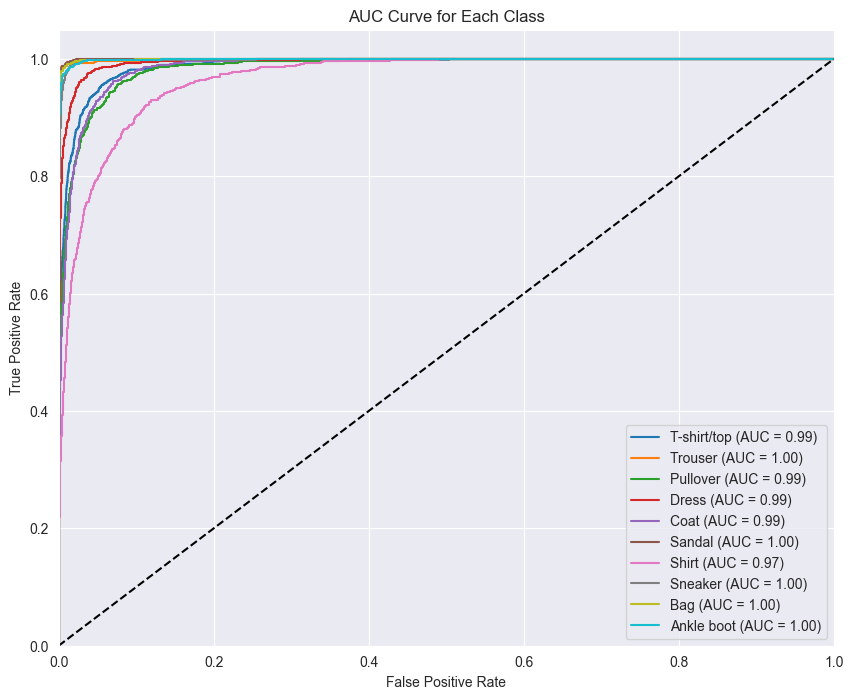

In [58]:
# Convert test labels to one-hot encoded format for AUC calculation
y_test_one_hot = to_categorical(y_test, num_classes=10)
y_pred_proba = model.predict(x_test)  # Get prediction probabilities for AUC

# Compute ROC curve and AUC for each class
plt.figure(figsize=(10, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

# Plot AUC curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
# Make predictions on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)  # Get the predicted class

# Generate classification report
report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print("Classification Report:\n")
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:

              precision    recall  f1-score   support

 T-shirt/top     0.8348    0.8440    0.8394      1000
     Trouser     0.9949    0.9730    0.9838      1000
    Pullover     0.7930    0.8350    0.8134      1000
       Dress     0.8493    0.9300    0.8878      1000
        Coat     0.8266    0.8010    0.8136      1000
      Sandal     0.9808    0.9700    0.9754      1000
       Shirt     0.7614    0.6700    0.7128      1000
     Sneaker     0.9530    0.9520    0.9525      1000
         Bag     0.9702    0.9780    0.9741      1000
  Ankle boot     0.9538    0.9710    0.9623      1000

    accuracy                         0.8924     10000
   macro avg     0.8918    0.8924    0.8915     10000
weighted avg     0.8918    0.8924    0.8915     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


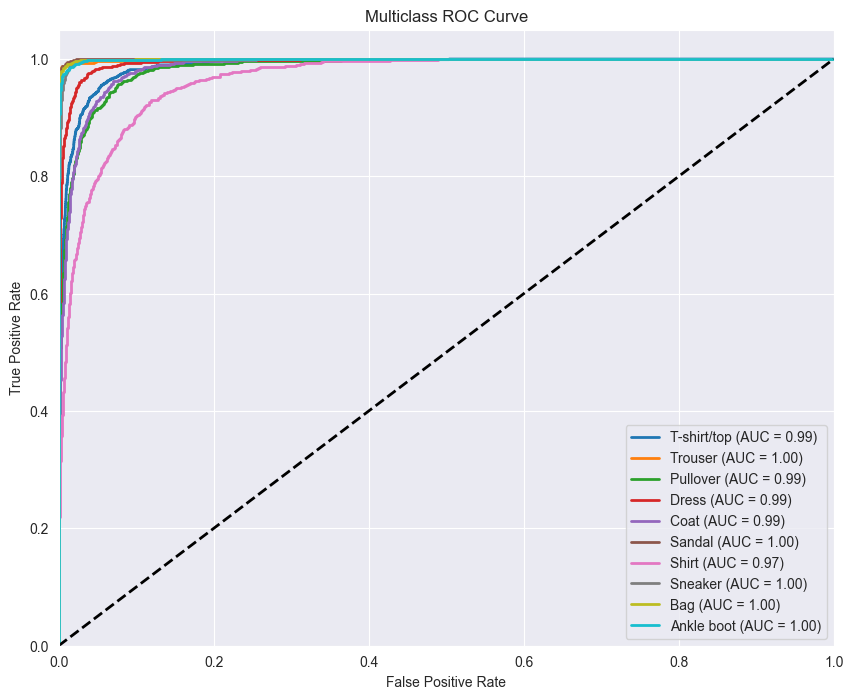

In [60]:
# Convert test labels to one-hot encoded format for AUC calculation
y_test_one_hot = to_categorical(y_test, num_classes=10)
y_pred_proba = model.predict(x_test)  # Get prediction probabilities for each class

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(class_names):
    # Compute ROC curve and AUC for each class
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal for random guessing
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()